In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
#레드와인 파일 불러오기
wine = pd.read_csv('C:/KIM/ML_week3_HW_datasets/winequality-red.csv', sep = ';')
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
#Q1
print(wine.info())
#A. NULL, 1599, 12, numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
#Q2
sum = wine.isna().sum().sum()
print("Totally there are {} null values in the dataset".format(sum))

Totally there are 0 null values in the dataset


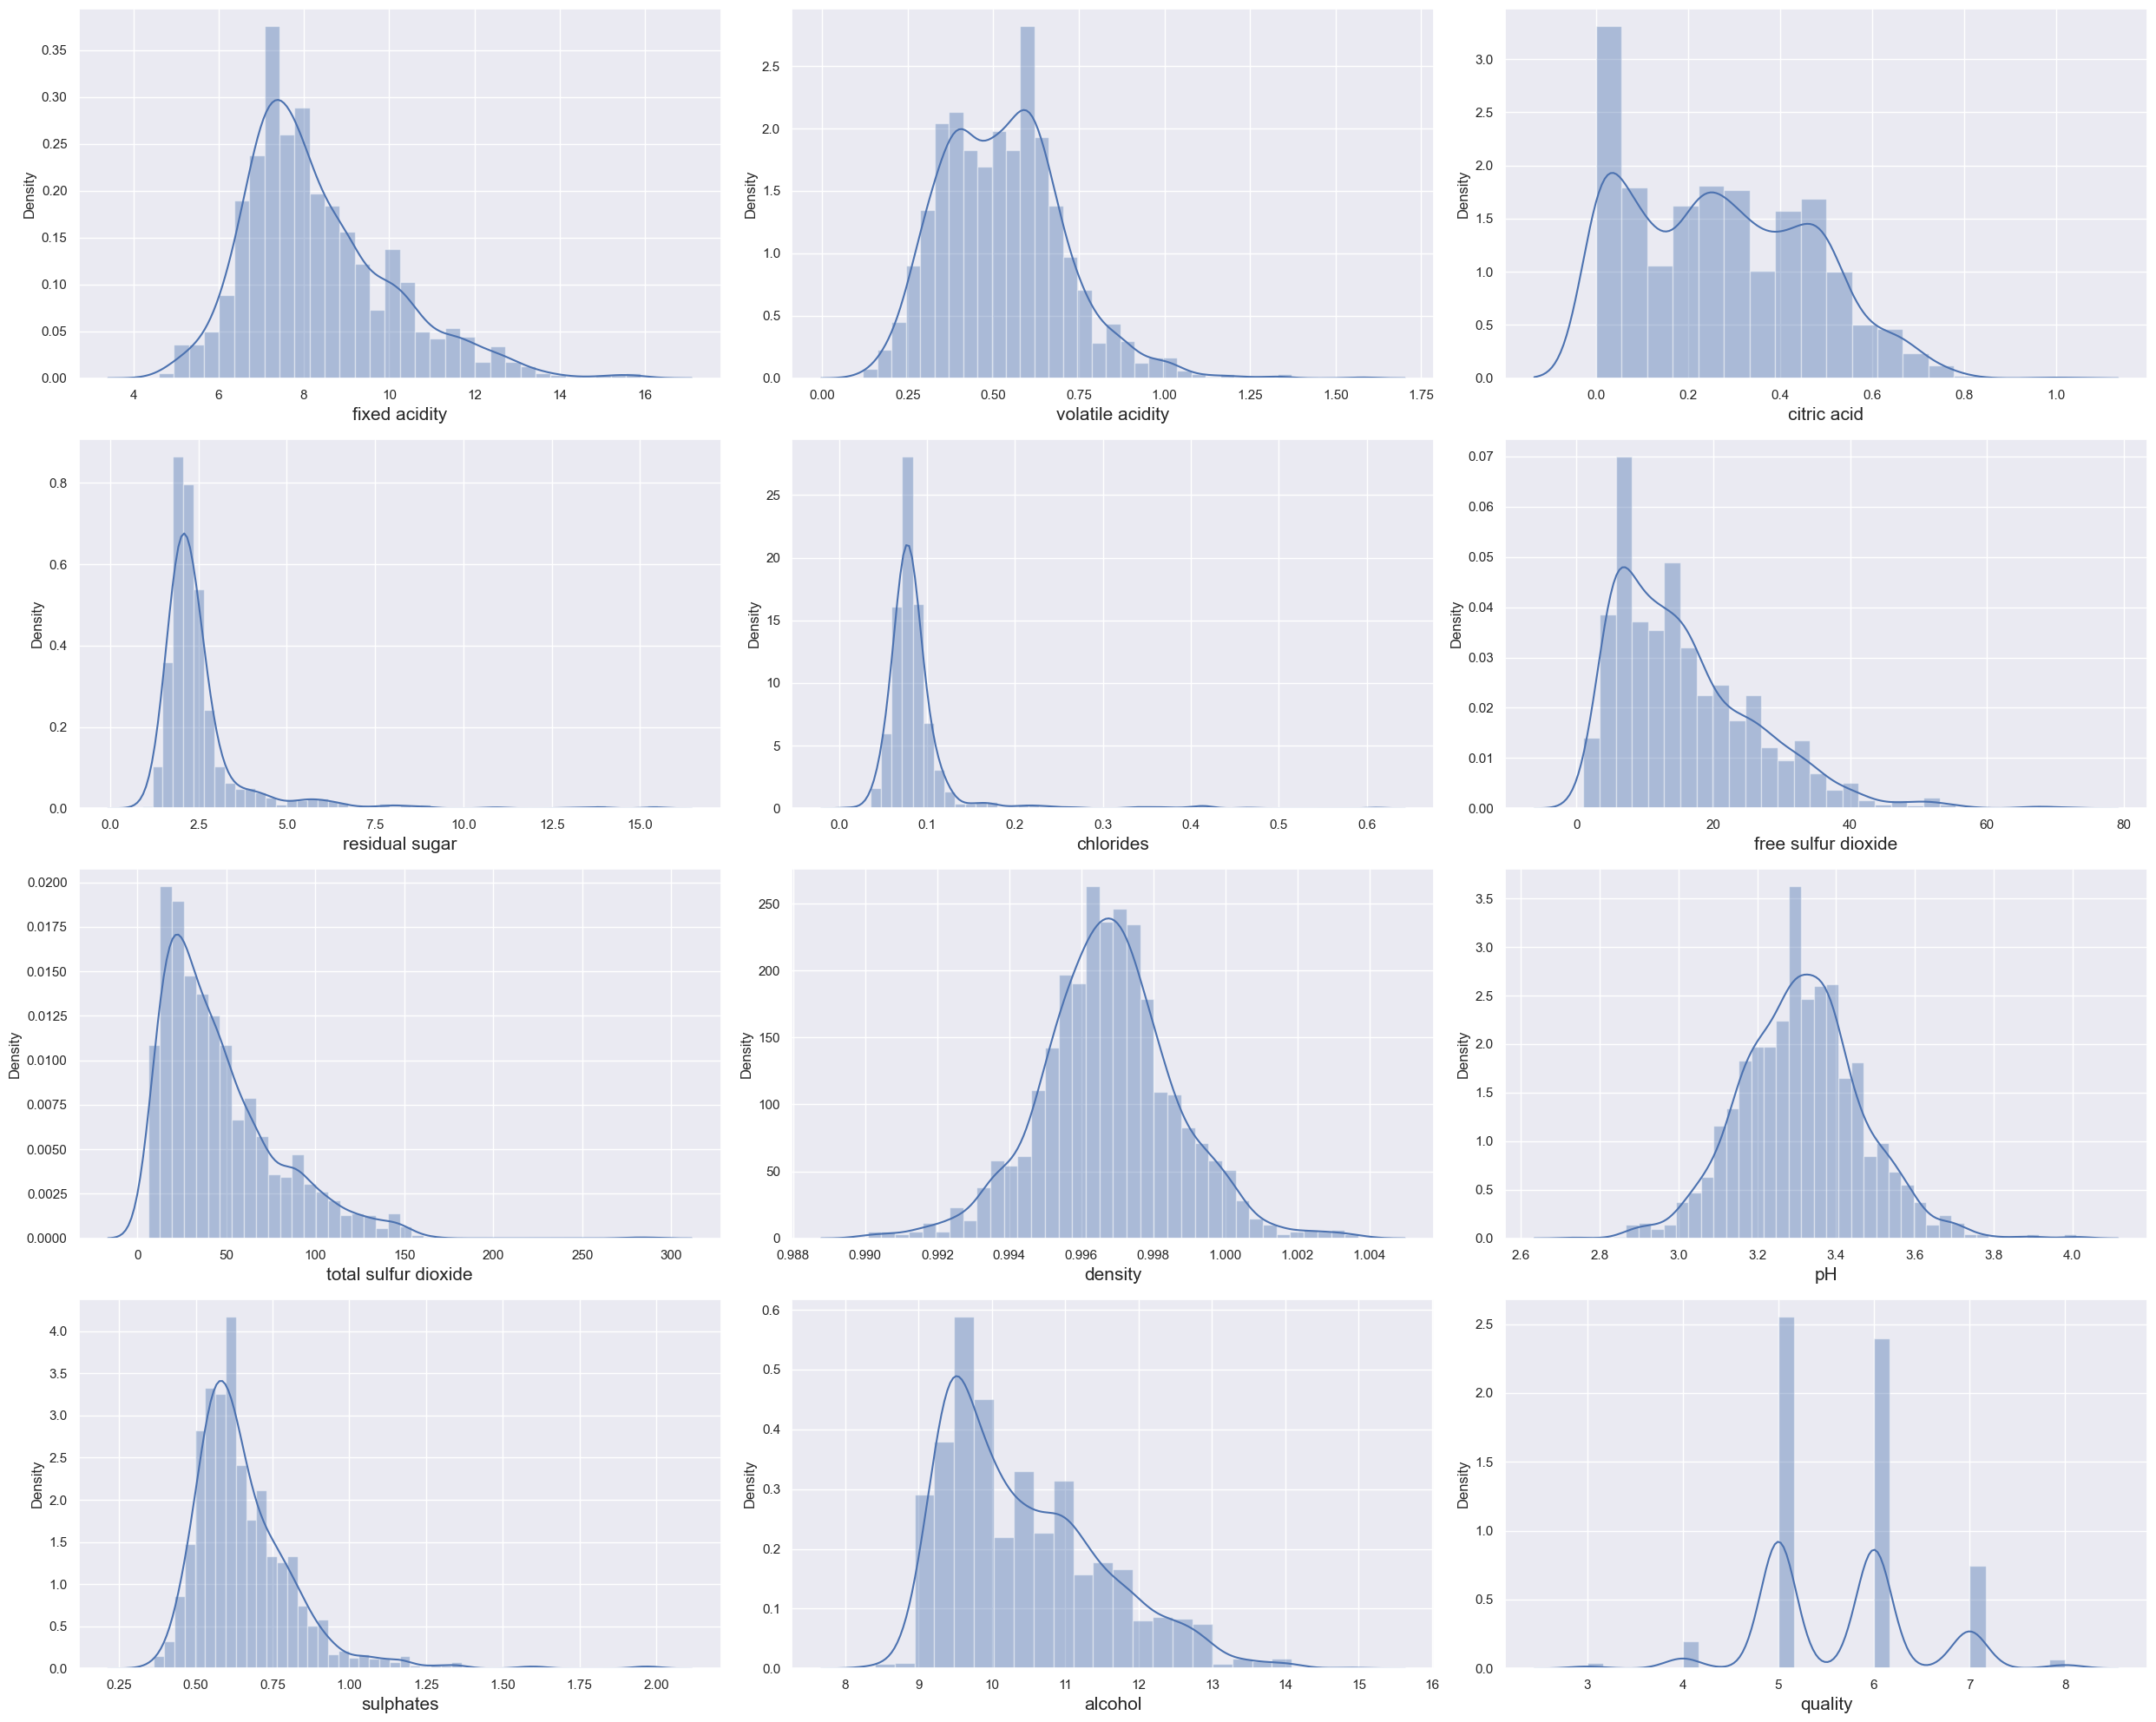

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [5]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in wine:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(wine[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

print(wine.describe(), wine.mode(), wine.kurt(), wine.skew())

#fixed_acidity는 왼쪽으로 skewed되어있는 분포를 보이고 있다. 7.2에서 가장 많은 개체가 분포되어있다. 
#volatile_acidity는 왼쪽으로 skewed되어있는 분포를 보이며 꼭대기가 뭉툭한 분포를 보이고 있다. 0.6에서 가장 많은 개체가 분포되어있다.
#citric_acid는 왼쪽으로 치우쳐져있는 분포를 보이며 첨도가 아주 높은 분포를 보이고 있다. 2에서 가장 많은 개체가 분포되어있다.

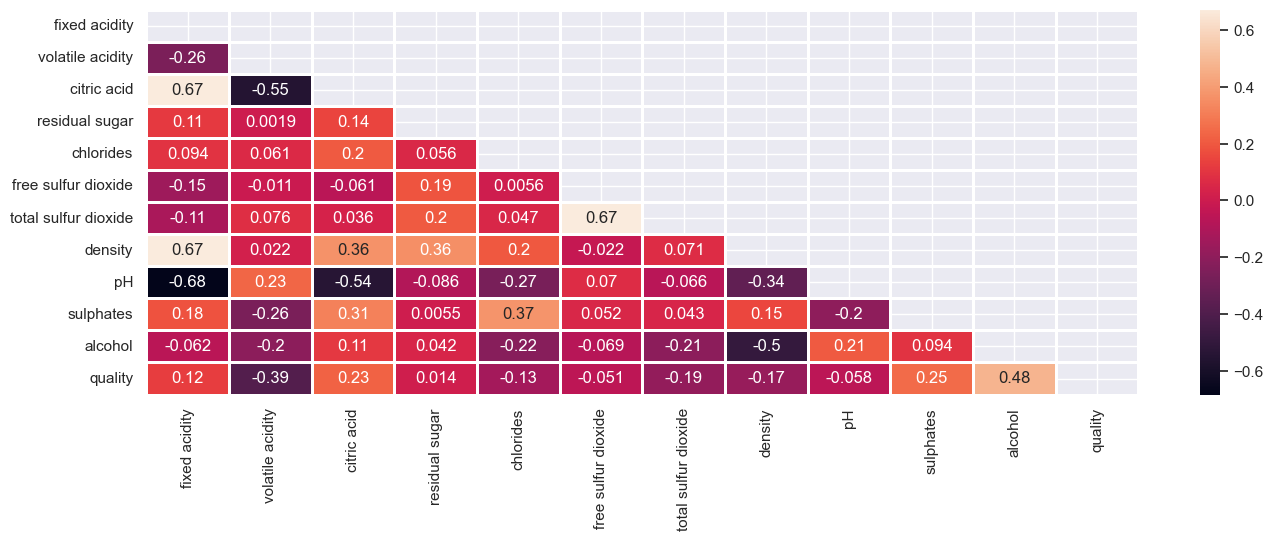

In [6]:
#Q4
plt.figure(figsize = (16, 5))
corr = wine.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()
#0.8이상의 상관계수를 다중공선성의 증거라고 할 때 다중공선성은 보이지 않는다.
# 하지만 (fixed_acidity, density)의 상관계수(0.67), (fixed_acidity, PH)의 상관계수(-0.68)
# (total_sulfur_dioxide, free_sulfur__dioxide)의 상관계수(0.67)을 주의깊게 볼 필요가 있다.

In [7]:
#Q5
wine["quality"] = np.where((wine['quality'] <= 5) & (wine['quality'] >= 3), 0, 1)
print(wine['quality'])

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


In [9]:
#Q6
y = wine['quality']
x = wine.drop('quality', axis = 1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)


In [10]:
#Q7
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

#standardization은 각기 다른 단위를 가진 변수가 있을 때 사용한다. 단위를 맞출 수 없으므로 표준화를 통해 데이터를 재표현한다.
#이를 통해 종속변수에 대한 독립변수들의 영향이 모두 똑같게 만들어 준다.
#standard scaler은 흔히 사용되는 z값이다. 데이터의 평균이 0, 표준편차가1이 되도록 만들어준다. 
#minmaxscaler은 min과 max를 이용하여 계산한다. 주로 0과 1사이로 변환한다.
#standard scaler은 분포가 정규분포일 때 효과적이지만 이상치에 민감하다.
#minmaxsclaer은 분포가 정규분포가 아니어도 괜찮으며 마찬가지로 이상치에 민감하다.
#이 데이터의 경우 정규분포를 따르지 않는 독립변수들이 많으므로 minmax scaler가 타당하다.

In [11]:
#Q7-5
print(x_train[0:5])
print("\n")
print(x_train.shape)
print("_________________________________________________________________________")
print(x_test[0:5])
print("\n")
print(x_test.shape)

print(y_train.head())
print(y_train.shape)
print("___________________________")
print(y_test.head())
print(y_test.shape)

#테스트 데이터는 검증을 위해 남겨둔 원본 데이터인데 fit을 하면 테스트 데이터까지 학습해버린다. 
#테스트 데이터까지 학습했으므로 모델이 테스트 데이터에 거의 다 들어 맞으면서 테스트 자체를 무의미하게 만든다.
#따라서 테스트 데이터에는 transform을, 훈련 데이터에는 fit_transform을 해야한다.

[[0.23893805 0.1369863  0.23       0.10769231 0.090301   0.47887324
  0.23529412 0.4441896  0.54330709 0.17365269 0.26153846]
 [0.32743363 0.38013699 0.26       0.09230769 0.12040134 0.14084507
  0.13602941 0.57568807 0.4488189  0.11976048 0.12307692]
 [0.69911504 0.17808219 0.6        0.13076923 0.11538462 0.42253521
  0.24264706 0.72859327 0.28346457 0.23952096 0.32307692]
 [0.36283186 0.44178082 0.22       0.10769231 0.08695652 0.11267606
  0.13235294 0.47629969 0.28346457 0.13173653 0.15384615]
 [0.32743363 0.49657534 0.01       0.1        0.09698997 0.05633803
  0.02941176 0.50688073 0.45669291 0.1497006  0.4       ]]


(1199, 11)
_________________________________________________________________________
[[0.37168142 0.19863014 0.64       0.1        0.13545151 0.11267606
  0.13235294 0.65214067 0.62992126 0.19760479 0.32307692]
 [0.36283186 0.34931507 0.28       0.13846154 0.14046823 0.22535211
  0.23161765 0.5558104  0.40944882 0.17964072 0.27692308]
 [0.51327434 0.15068493 0.58  

In [22]:
#Q8. 로지스틱회귀로 classification model 수립하기

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
     
}

logistic_cv_model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv = 10)
logistic_cv_model.fit(x_train, y_train)

print(str(logistic_cv_model.best_params_['C']),
      logistic_cv_model.best_params_['penalty'],
      logistic_cv_model.best_params_['solver'],
      str(logistic_cv_model.best_score_))

logistic_model = LogisticRegression(C = logistic_cv_model.best_params_['C'],
                                    penalty = logistic_cv_model.best_params_['penalty'],
                                    solver = logistic_cv_model.best_params_['solver'])
logistic_model.fit(x_train, y_train)



100 l2 liblinear 0.7456442577030812
<bound method LogisticRegression.fit of LogisticRegression(C=100, solver='liblinear')>


In [24]:
from sklearn.metrics import accuracy_score
y_pred = logistic_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       188
           1       0.78      0.74      0.76       212

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



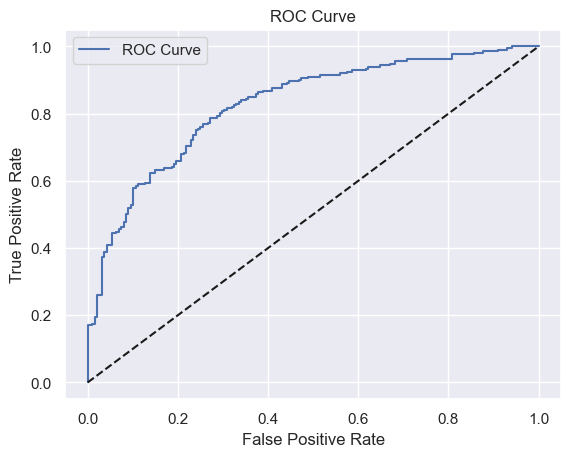

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = logistic_model.predict_proba(x_test)[:,1]
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
#결과해석

#logistic_cv_model.best_score_이 약0.75가 나왔다. 준수한 점수가 나왔으므로 하이퍼파라미터 선정 방법이 적합했음을 알 수 있다.
#Accuracy는 0.75로 모델이 준수한 정확도를 보인다고 할 수 있다.
#precision, recall, f1 score을 볼 때 모델은 대략 0.75의 정확도를 보인다고 할 수 있다.
#ROC curve또한 좌상단에 가까우므로 모델은 적합하다고 할 수 있다.
#따라서 이 모델은 0.75의 분류 성능을 보이며 분류를 준수하게 잘 했다고 볼 수 있다.
